In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# display + plot settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

Load Dataset:

In [2]:
coupon = fetch_ucirepo(id=603)     # fetch Dataset
X = coupon.data.features
y = coupon.data.targets
df = pd.concat([X, y], axis=1)      # merge

First Inspection of the Dataset

In [3]:
df.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
df['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [5]:
# rows + columns
n_rows, n_cols = df.shape
print(f"Rows: {n_rows}, Columns: {n_cols}")

print(coupon.variables)


Rows: 12684, Columns: 26
                    name     role         type      demographic description  \
0            destination  Feature  Categorical             None        None   
1              passenger  Feature  Categorical             None        None   
2                weather  Feature  Categorical             None        None   
3            temperature  Feature      Integer             None        None   
4                   time  Feature  Categorical             None        None   
5                 coupon  Feature  Categorical             None        None   
6             expiration  Feature  Categorical             None        None   
7                 gender  Feature  Categorical           Gender        None   
8                    age  Feature      Integer              Age        None   
9          maritalStatus  Feature  Categorical   Marital Status        None   
10          has_children  Feature       Binary            Other        None   
11             education  F

Count the Target Variable

In [6]:
df['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

Distribution of Numerical Features

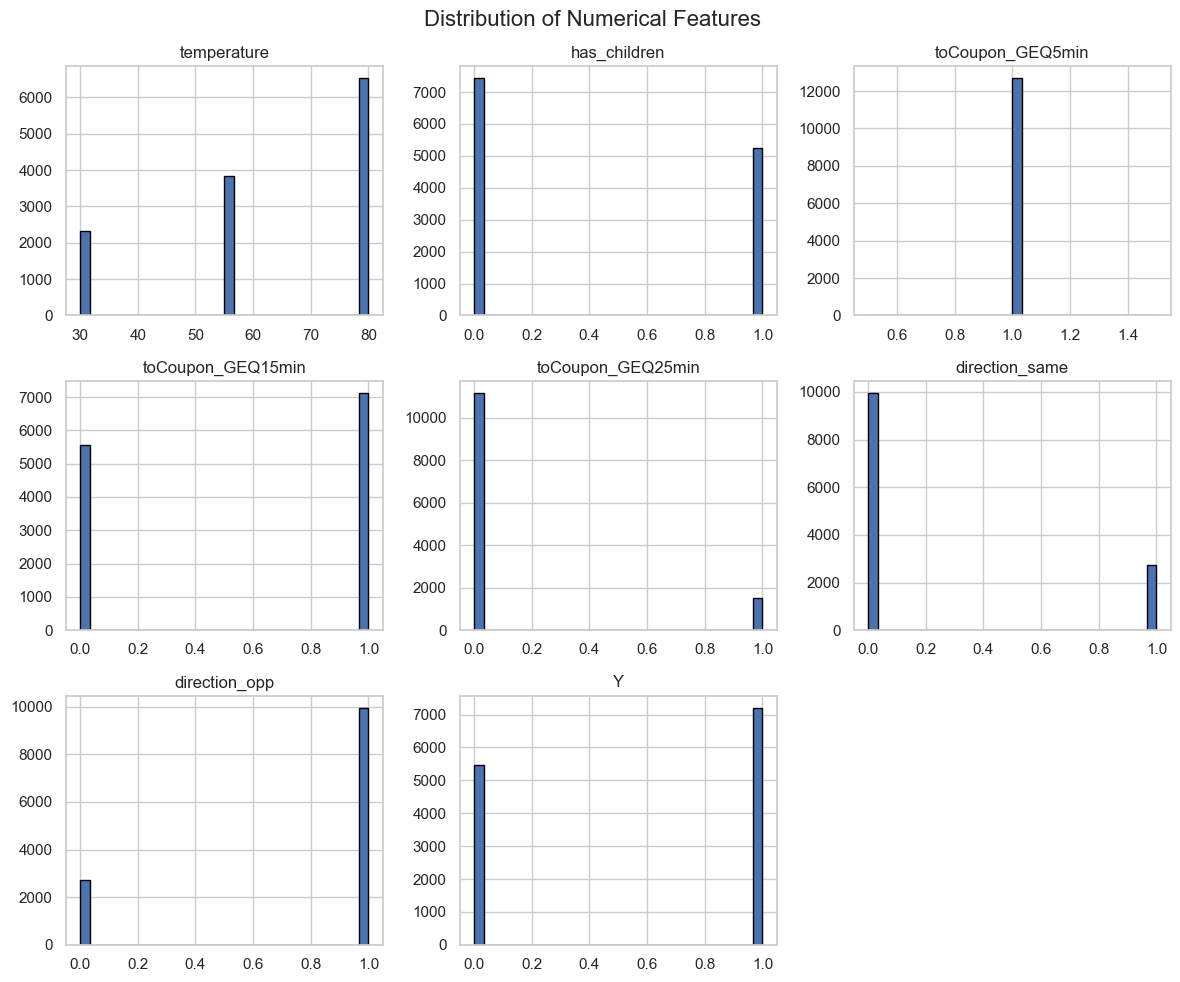

In [7]:
(df.hist(
    bins=30, figsize=(12, 10), edgecolor='black'
))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

Distribution for all variables

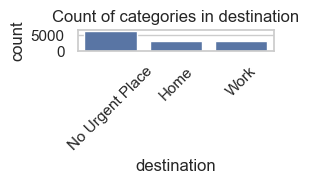

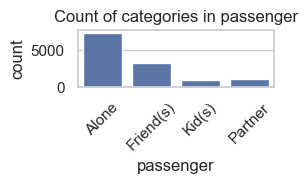

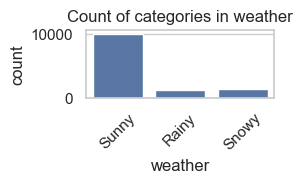

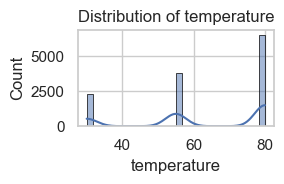

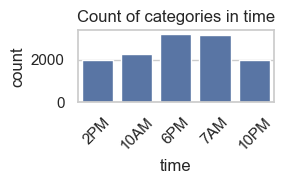

/var/folders/jg/ymy7y6pd27337l_sk7fr_rsr0000gn/T/ipykernel_55445/4241329709.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


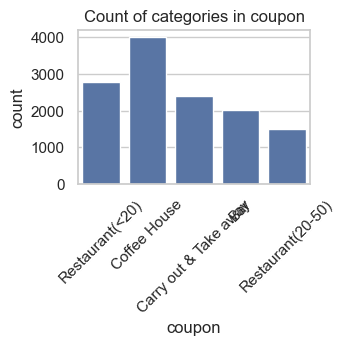

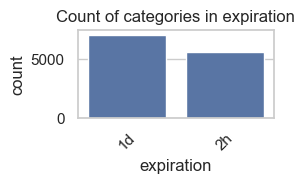

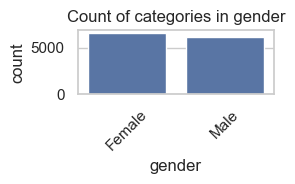

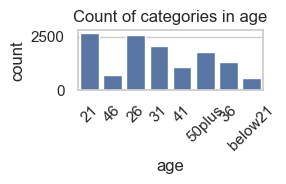

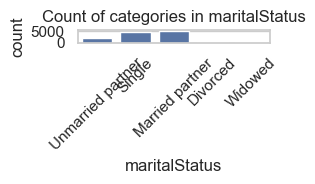

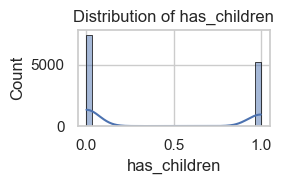

/var/folders/jg/ymy7y6pd27337l_sk7fr_rsr0000gn/T/ipykernel_55445/4241329709.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


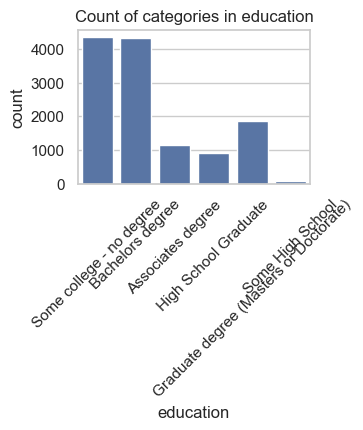

/var/folders/jg/ymy7y6pd27337l_sk7fr_rsr0000gn/T/ipykernel_55445/4241329709.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


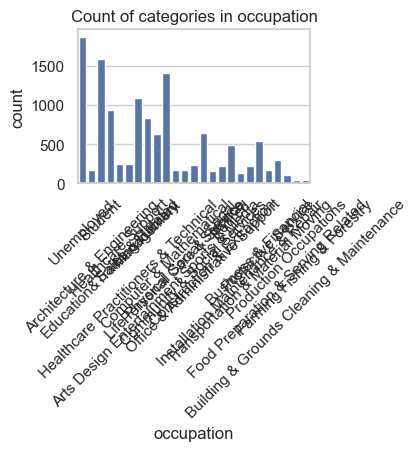

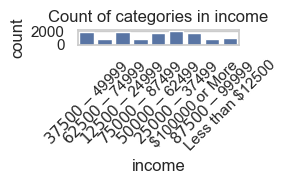

/var/folders/jg/ymy7y6pd27337l_sk7fr_rsr0000gn/T/ipykernel_55445/4241329709.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


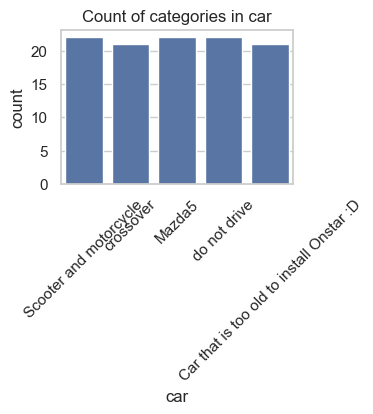

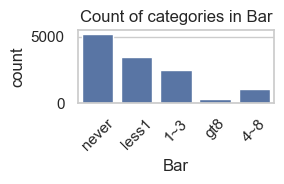

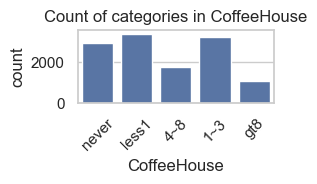

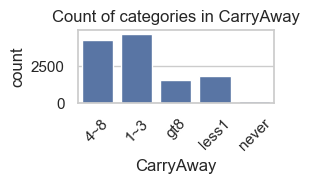

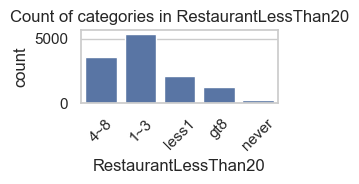

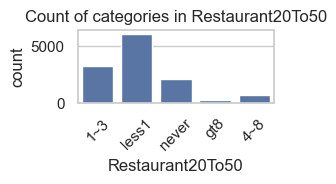

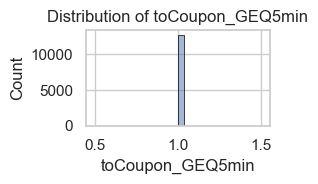

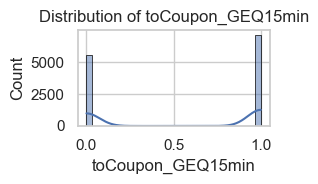

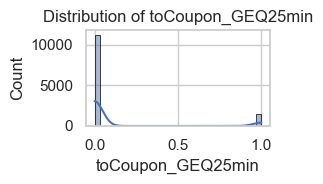

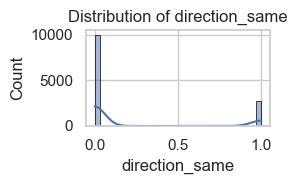

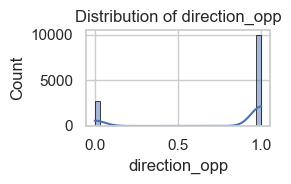

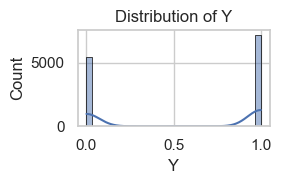

In [8]:
for col in df.columns:
    plt.figure(figsize=(3,2))
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(df[col], bins=30, kde=True, edgecolor='black')
        plt.title(f'Distribution of {col}')
    else:
        sns.countplot(x=df[col])
        plt.title(f'Count of categories in {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [9]:
info_table = []
meta = coupon.variables
for col in df.columns:
    s = df[col]
    meta_row = meta[meta["name"] == col]

    uci_type = meta_row["type"].iloc[0] if not meta_row.empty else "-"
    desc = meta_row["description"].iloc[0] if not meta_row.empty else "-"

    n_unique = s.nunique(dropna=True)
    n_missing = s.isna().sum()

    # value range / categories
    if uci_type in ["Integer", "Numeric"]:
        value_range = f"{s.min()} – {s.max()}"
    else:
        cats = s.dropna().unique().tolist()
        cats_preview = ", ".join(map(str, cats[:5]))
        if len(cats) > 5:
            cats_preview += ", ..."
        value_range = cats_preview

    info_table.append({
        "Variable": col,
        "Description": desc,
        "UCI Type": uci_type,
        "Unique Values": n_unique,
        "Missing Values": n_missing,
        "Value Range / Categories": value_range
    })

var_table = pd.DataFrame(info_table)
pd.set_option("display.max_colwidth", 100)
pd.set_option("display.width", 180)

print(f"{df.shape[0]} rows × {df.shape[1]} columns\n")
print(var_table)

12684 rows × 26 columns

                Variable Description     UCI Type  Unique Values  Missing Values  \
0            destination        None  Categorical              3               0   
1              passenger        None  Categorical              4               0   
2                weather        None  Categorical              3               0   
3            temperature        None      Integer              3               0   
4                   time        None  Categorical              5               0   
5                 coupon        None  Categorical              5               0   
6             expiration        None  Categorical              2               0   
7                 gender        None  Categorical              2               0   
8                    age        None      Integer              8               0   
9          maritalStatus        None  Categorical              5               0   
10          has_children        None       Binary  

In [10]:
freq_cols = ["Bar", "CoffeeHouse", "CarryAway",
             "RestaurantLessThan20", "Restaurant20To50"]

# Anteil fehlender Werte pro Spalte
print(df[freq_cols].isna().sum())

# Prüfen, in wie vielen Zeilen mindestens ein fehlender Wert vorkommt
any_missing = df[freq_cols].isna().any(axis=1).sum()

# Prüfen, in wie vielen Zeilen alle fünf gleichzeitig fehlen
all_missing = df[freq_cols].isna().all(axis=1).sum()

print(f"\nRows with any missing value in these 5 cols: {any_missing}")
print(f"Rows with all 5 missing: {all_missing}")

# Anteil relativ zur gesamten Datengröße
pct = any_missing / len(df) * 100
print(f"→ {pct:.2f}%")

Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
dtype: int64

Rows with any missing value in these 5 cols: 605
Rows with all 5 missing: 42
→ 4.77%


Distribution of Age (sorted)

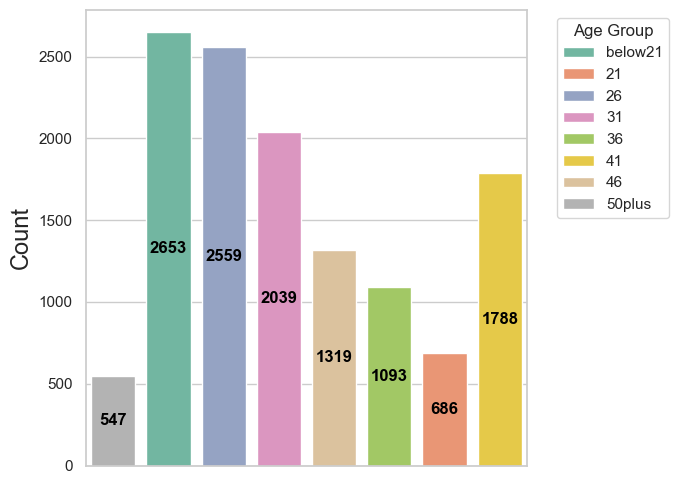

In [11]:

# Define order for age
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

# Convert age to ordered categorical
df['age'] = pd.Categorical(df['age'], categories=age_order, ordered=True)

# Define color palette
palette = sns.color_palette("Set2", len(age_order))

plt.figure(figsize=(7, 5))

# Use hue=age and legend=False to avoid the deprecation warning
ax = sns.countplot(
    x='age',
    hue='age',
    data=X,
    order=age_order,
    palette=palette,
    legend=False
)

# Remove x-axis labels for compact layout
ax.set_xticklabels([])
ax.set_xlabel('')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height / 2,
        f'{int(height)}',
        ha='center', va='center',
        color='black', fontweight='bold'
    )

plt.ylabel('Count', size = 17)

# Custom legend (cleaner and stable)
plt.legend(
    handles=ax.patches[:len(age_order)],
    labels=age_order,
    title='Age Group',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize = 11
)

plt.tight_layout()
plt.show()


Distribution of occupation

Distribution of Coupon

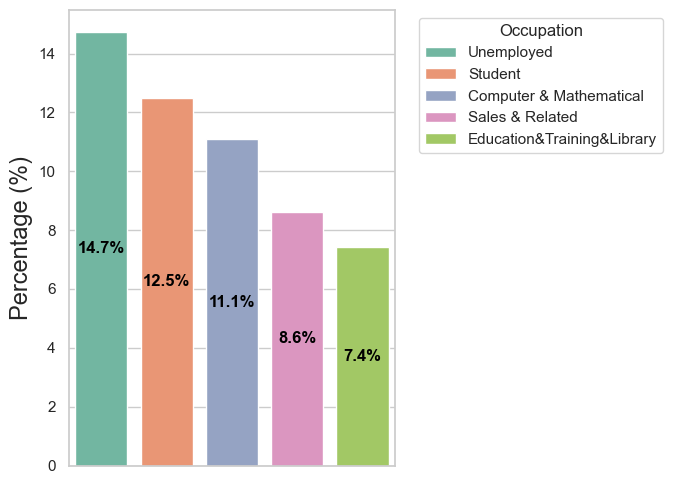

In [12]:

# Get top 5 occupations
top_occupations = df['occupation'].value_counts().index[:5]

# Define color palette
palette = sns.color_palette("Set2", len(top_occupations))

# Calculate normalized (percent) frequencies
occupation_counts = df['occupation'].value_counts(normalize=True) * 100
occupation_counts = occupation_counts[top_occupations]  # only top 5

plt.figure(figsize=(7, 5))

# Plot percentages manually (since sns.countplot shows counts)
ax = sns.barplot(
    x=occupation_counts.index,
    y=occupation_counts.values,
    hue=occupation_counts.index,
    palette=palette,
    legend=False
)

# Remove x-axis labels for compact layout
ax.set_xticklabels([])
ax.set_xlabel('')

plt.ylabel('Percentage (%)', size=17)

# Add percentage labels inside bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height / 2,
        f'{height:.1f}%',
        ha='center', va='center',
        color='black', fontweight='bold'
    )

# Custom legend (colors → occupation names)
plt.legend(
    handles=ax.patches[:len(top_occupations)],
    labels=top_occupations.tolist(),
    title='Occupation',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
        fontsize = 11

)

plt.tight_layout()
plt.show()


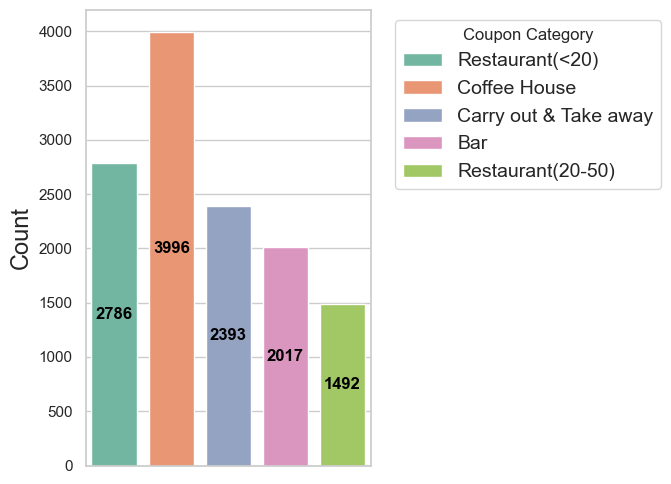

In [13]:

# Define color palette for each coupon type
palette = sns.color_palette("Set2", df['coupon'].nunique())

plt.figure(figsize=(7, 5))

# Plot with custom colors per category
ax = sns.countplot(
    x='coupon',
    hue='coupon',
    data=X,
    palette=palette,
    legend=False
)

# Remove x-axis labels to make it more compact
ax.set_xticklabels([])
ax.set_xlabel('')

plt.ylabel('Count', size= 17)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height / 2,
        f'{int(height)}',
        ha='center', va='center',
        color='black', fontweight='bold'
    )

# Create legend manually (for bar descriptions)
handles, labels = ax.get_legend_handles_labels()

unique_labels = df['coupon'].unique()
plt.legend(
    ax.patches[:len(unique_labels)],
    unique_labels,
    title='Coupon Category',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
        fontsize = 14

)

plt.tight_layout()
plt.show()

Distribution of Car

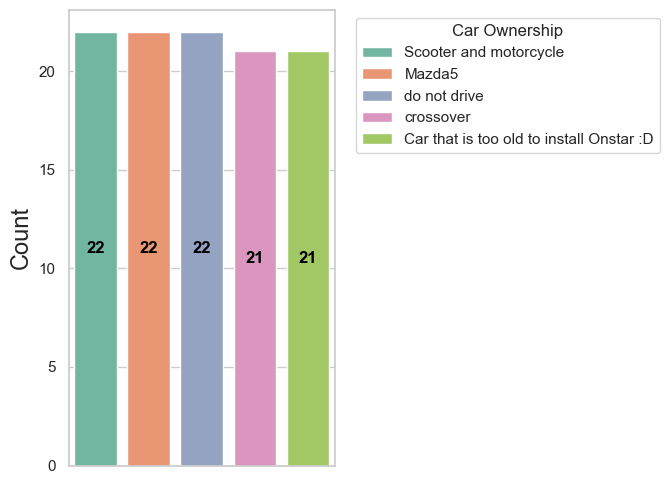

In [14]:

# Count the occurrences of each car category
car_counts = df['car'].value_counts().reset_index()
car_counts.columns = ['Car', 'Count']

# Define color palette
palette = sns.color_palette("Set2", len(car_counts))

plt.figure(figsize=(7, 5))

# Plot with Seaborn (using hue for legend colors)
ax = sns.barplot(
    x='Car',
    y='Count',
    hue='Car',
    data=car_counts,
    palette=palette,
    legend=False
)

# Remove x-axis labels for compact layout
ax.set_xticklabels([])
ax.set_xlabel('')

plt.ylabel('Count', size=17)

# Add count labels centered on the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height / 2,
        f'{int(height)}',
        ha='center', va='center',
        color='black', fontweight='bold'
    )

# Add legend on the right
plt.legend(
    handles=ax.patches[:len(car_counts)],
    labels=car_counts['Car'].tolist(),
    title='Car Ownership',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
        fontsize = 11

)

plt.tight_layout()
plt.show()


PREPROCCESING STEPS

Missing values per feature:
car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
dtype: int64


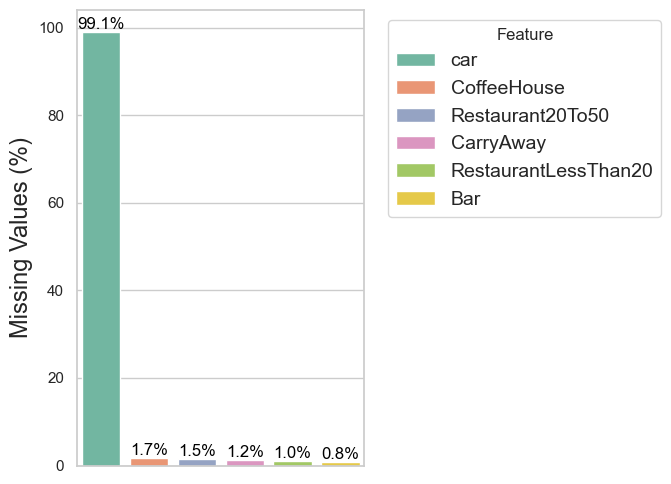

In [15]:

# 1. Calculate percentage of missing values per column
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Print missing counts for reference
print("Missing values per feature:")
print(X.isnull().sum()[X.isnull().sum() > 0].sort_values(ascending=False))

# Prepare data for plotting
missing_df = pd.DataFrame({
    'Feature': missing_percent.index,
    'MissingPercent': missing_percent.values
})

# Define color palette
palette = sns.color_palette("Set2", len(missing_df))

plt.figure(figsize=(7, 5))

# 2. Plot using Seaborn barplot (percentages)
ax = sns.barplot(
    x='Feature',
    y='MissingPercent',
    hue='Feature',
    data=missing_df,
    palette=palette,
    legend=False
)

# Remove x-axis labels for compact layout
ax.set_xticklabels([])
ax.set_xlabel('')

plt.ylabel('Missing Values (%)', size=17)

# 4.Use of container
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', color='black')

# 5. Add legend on the right
plt.legend(
    handles=ax.patches[:len(missing_df)],
    labels=missing_df['Feature'].tolist(),
    title='Feature',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize = 14
)

plt.tight_layout()
plt.show()
